# Image registration


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import spatiomic as so

## Load example data and shift it


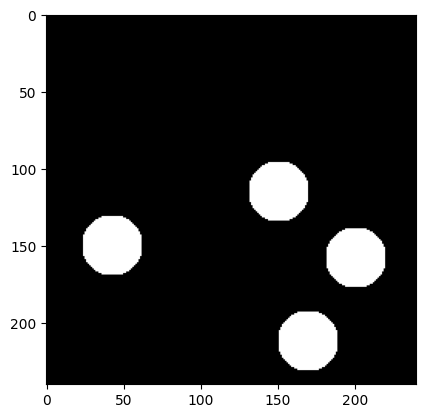

In [2]:
# read the example data
img_data = so.data.read().read_tiff("./data/example.tiff")[:, :, 0]
plt.imshow(img_data, cmap="gray")

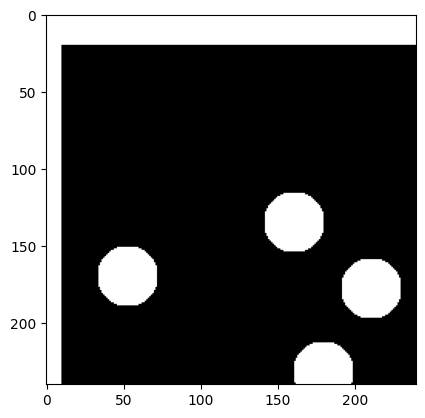

In [3]:
img_data_shifted = so.process.register.apply_shift(img_data, (20, 10))
plt.imshow(img_data_shifted, cmap="gray")

## Detect the shift and correct it


In [4]:
shift = so.process.register.get_shift(
    img_data_shifted,
    img_data,
    method="phase_correlation",
    blur=False,
    threshold=False,
    match_histogram=False,
    upsample_factor=1,
)

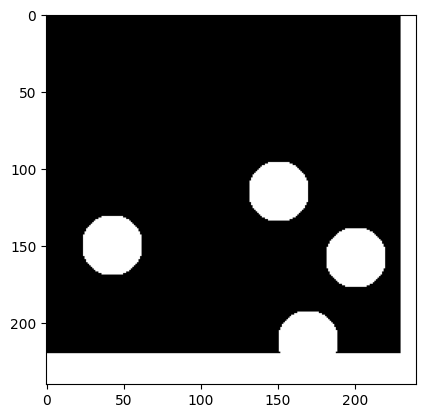

In [5]:
img_corrected = so.process.register.apply_shift(img_data_shifted, shift)
plt.imshow(img_corrected, cmap="gray")

(np.float64(-0.5), np.float64(229.5), np.float64(219.5), np.float64(-0.5))

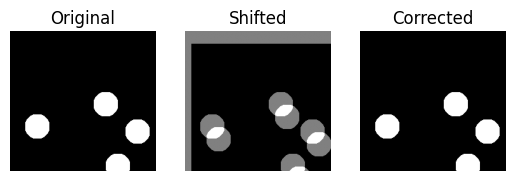

In [6]:
# crop to the overlapping region
img_corrected = img_corrected[: int(shift[0]), : int(shift[1])]
img_data = img_data[: int(shift[0]), : int(shift[1])]
img_shifted = img_data_shifted[: int(shift[0]), : int(shift[1])] * 0.5 + img_data * 0.5
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(img_data, cmap="gray")
ax0.set_title("Original")
ax0.axis("off")
ax1.imshow(img_shifted, cmap="gray")
ax1.set_title("Shifted")
ax1.axis("off")
ax2.imshow(img_corrected, cmap="gray")
ax2.set_title("Corrected")
ax2.axis("off")

## Evaluate the correction


In [7]:
ssim_before = so.process.register.get_ssim(img_shifted, img_data)
ssim_after = so.process.register.get_ssim(img_corrected, img_data)
print(f"SSIM before: {ssim_before:.2f}, SSIM after: {ssim_after:.2f}")

SSIM before: 0.82, SSIM after: 1.00


In [8]:
df_register = pd.DataFrame(
    {
        "Before Registration": [ssim_before],
        "After Registration": [ssim_after],
    }
)

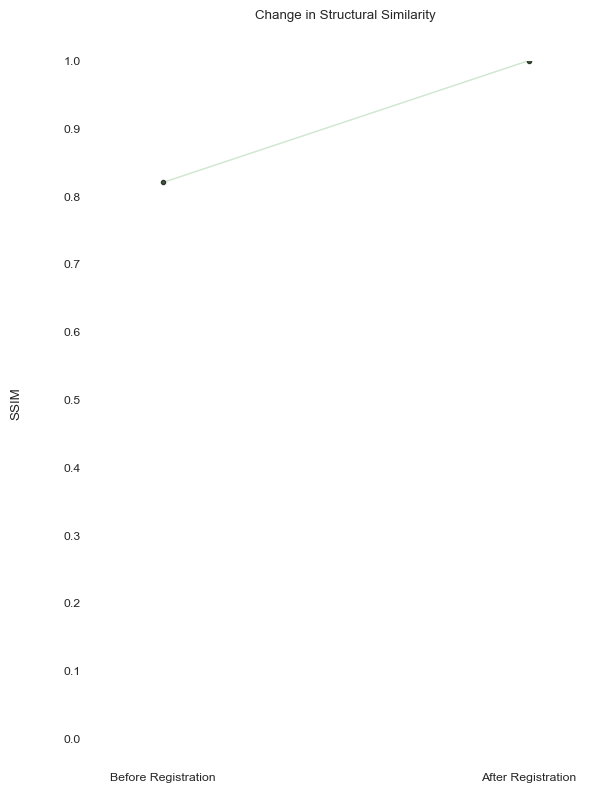

In [9]:
fig = so.plot.registration_slope(df_register)

You can also view this data by image.


In [10]:
df_register = pd.DataFrame(
    {
        "Before Registration": [ssim_before, 0.6, 0.7, 0.8, 0.9],
        "After Registration": [ssim_after, 0.95, 0.96, 0.97, 0.98],
    },
    index=["Image 1", "Image 2", "Image 3", "Image 4", "Image 5"],
)

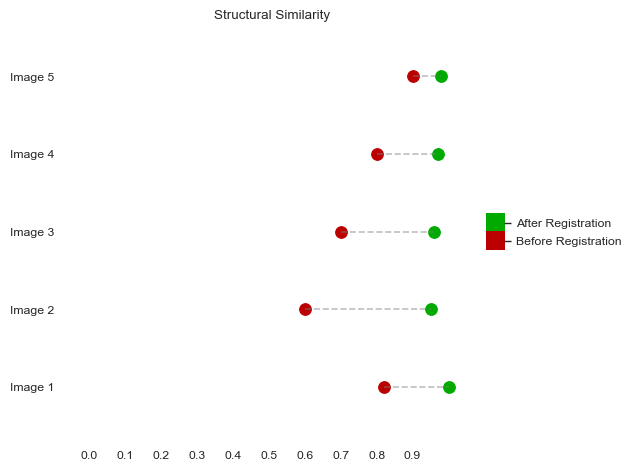

In [11]:
fig = so.plot.registration_similarity(
    df_similarity=df_register,
    before_label="Before Registration",
    after_label="After Registration",
)